In [31]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()


filename = '../data/demo_2020_0505.sqlite'
sql = '''SELECT * FROM inverter_minutely'''
with sqlite3.connect(filename) as con:
    df = pd.read_sql(sql, con=con)
    
df.LoggedDatetime = pd.to_datetime(df.LoggedDatetime) # convert string to pandas datetime object
df['minute'] = df.LoggedDatetime.dt.strftime('%Y-%m-%d %H:%M:00') # repalce seconds with 0
df['hour']   = df.LoggedDatetime.dt.strftime('%H') 

select_columns = ['DeviceID', 'hour', 'minute', 'ACOutputPower']
df = df[select_columns]

#df.set_index(['minute'], inplace=True)
df.set_index(['hour'], inplace=True)
df.head()

,DeviceID,minute,ACOutputPower
hour,,,
05,1,2020-05-05 05:12:00,0.0
05,2,2020-05-05 05:12:00,0.0
05,3,2020-05-05 05:12:00,0.0
05,4,2020-05-05 05:12:00,0.0
05,5,2020-05-05 05:12:00,0.0


In [32]:
def get_dfs(df):
    result = []
    for id in (1,2,3,4,5,18,19):
        condition = (df['DeviceID'] == id)
        invdf = df[condition]
        invdf = invdf[['ACOutputPower']]
        
        invdfh = invdf.groupby('hour').mean()
        invdfh = invdfh.rename(columns={'ACOutputPower': 'power-{}'.format(id)})
        result.append(invdfh)
    df = pd.concat(result, axis=1)
    return df

df = get_dfs(df)
df = df.dropna()
df
#invdfh = invdf.groupby('hour').mean()
#invdfh = invdfh.rename(columns={'ACOutputPower': 'ACOutputPower-{}'.format(1)})
#invdfh

,power-1,power-2,power-3,power-4,power-5,power-18,power-19
hour,,,,,,,
05,0.884043,0.829574,0.917021,0.796383,0.825532,0.439348,0.053721
06,12.525085,11.435932,12.953051,12.692712,12.904407,5.736780,1.902203
07,26.582712,22.899153,26.459153,26.754746,27.731864,12.364915,6.509322
08,35.334237,32.201356,35.193390,34.855932,35.722881,16.388136,10.853729
09,38.648448,36.578621,38.493103,37.833793,38.710862,17.460345,10.005862
10,43.135476,41.882857,42.545000,41.635238,42.709048,20.646429,10.050476
11,43.447241,43.169483,42.521724,41.569655,42.754138,19.386552,10.807759
12,40.994048,41.784524,40.626667,39.346905,40.445714,14.182143,8.964286
13,35.922759,37.076034,35.294483,34.017586,34.927241,15.055862,9.393966


<AxesSubplot:xlabel='hour'>

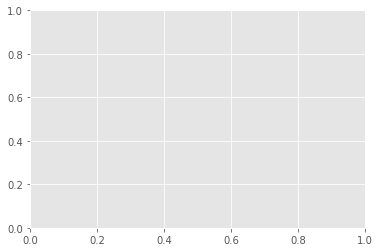

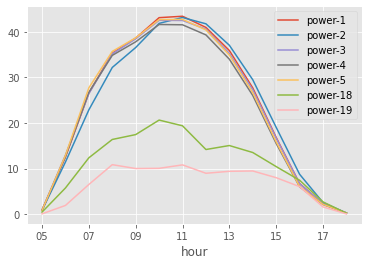

In [33]:
import matplotlib
matplotlib.style.use("ggplot")
fig, ax = plt.subplots(1)
df.plot()


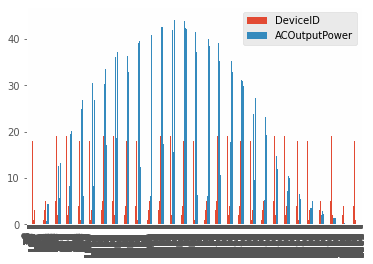